In [25]:
import os
import mat73
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt

In [26]:
rawADC = mat73.loadmat("PostProc_22_1/adcData.mat")

dim = rawADC["adcRawData"]["dim"]
data = np.array(rawADC["adcRawData"]["data"], dtype=np.uint16)
rfParams = rawADC["adcRawData"]["rfParams"]

In [27]:
dim

{'numChirpsPerFrame': array(128.),
 'numFrames': array(128.),
 'numRxChan': array(4.),
 'numSamples': array(256.)}

In [28]:
rfParams

{'bandwidth': array(0.76753921),
 'dopplerResolutionMps': array(0.09511972),
 'framePeriodicity': array(40.),
 'freqSlope': array(29.98200035),
 'numDopplerBins': array(128.),
 'numRangeBins': array(256.),
 'rangeResolutionsInMeters': array(0.19542976),
 'sampleRate': array(10.),
 'startFreq': array(77.)}

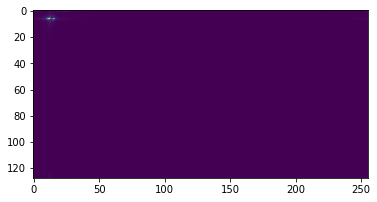

In [29]:
data = data.reshape((128, 128, 256, 8))[:, :, :, [0, 4]]
data = data - (data>=np.power(2, 15))*np.power(2, 16)
beat = (data[:, :, :, 0] + 1j*data[:, :, :, 1]).astype(np.complex64)
range = np.fft.fft(beat, axis=2)
doppler = np.fft.fft(range, axis=1)
doppler = np.abs(doppler)
doppler = np.uint8((doppler-np.min(doppler))/(np.max(doppler)-np.min(doppler))*255)
plt.imshow(doppler[0])

In [32]:
doppler[0].shape

(128, 256)